In [1]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np
%matplotlib inline
# mydata = quandl.get("FRED/GDP")

In [2]:
#read sales csv
df_sales = pd.read_csv('proyek_skripsi/sales.csv')
df_sales.head()

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,date,quote_id,reference_no,customer_id,customer,biller_id,biller,warehouse_id,note,...,rounding,suspend_note,api,shop,address_id,reserve_id,hash,salesman_id,salesman_commission,total_commission
0,22,2017-07-15 13:35:00,0,HBA/2017/07/0016,127,DAMAI SANTOSO,3,Test Biller,1,NaN,...,NaN,NaN,0,0,NaN,NaN,85470c87f1f753c6b657d6529d83354d7561bc4b296a51...,NaN,NaN,NaN
1,24,2017-07-03 08:00:00,0,HBA/2017/07/0018,132,AWANG JAYA,3,Test Biller,1,NaN,...,NaN,NaN,0,0,NaN,NaN,16c4a643d0d939f6b022b2ec1965e1c2a90f1a8a1e8c1b...,NaN,NaN,NaN
2,25,2017-07-04 08:00:00,0,HBA/2017/07/0019,124,CV TRISAKTI,3,Test Biller,1,&lt;p&gt;CANDY BOX DAN EMBER 0&period;5 TDK TE...,...,NaN,NaN,0,0,NaN,NaN,352c58cffea15e09329bb97140f86f0056a9d67bc64c13...,NaN,NaN,NaN
3,26,2017-07-04 08:00:00,0,HBA/2017/07/0020,125,GOGO,3,Test Biller,1,&lt;p&gt;hb0280&lt;&sol;p&gt;,...,NaN,NaN,0,0,NaN,NaN,b4195a3294e823f77f655401fff69cc8da9e972d842a36...,NaN,NaN,NaN
4,27,2017-07-04 08:00:00,0,HBA/2017/07/0021,126,CV TIGA PILAR,3,Test Biller,1,&lt;p&gt;HB0281&lt;&sol;p&gt;,...,NaN,NaN,0,0,NaN,NaN,de9f776ac2749c4e81bf5b6aeb10e0eeae737c31b9b691...,NaN,NaN,NaN


In [3]:
#drop column that has > 80% null value
df_sales = df_sales.drop(['note', 'staff_note', 'order_discount_id', 'updated_by', 'updated_at', 'return_id', 'attachment', 'return_sale_ref', 'sale_id', 'rounding', 'suspend_note', 'address_id', 'reserve_id', 'salesman_id', 'salesman_commission', 'total_commission', 'product_discount', 'total_discount', 'grand_total', 'payment_term', 'due_date', 'paid', 'customer', 'quote_id', 'reference_no', 'biller_id', 'biller', 'warehouse_id', 'order_discount', 'product_tax', 'order_tax_id', 'order_tax', 'total_tax', 'shipping', 'pos', 'surcharge', 'api', 'shop', 'hash', 'created_by', 'sale_status', 'payment_status', 'return_sale_total', 'total_items'], axis=1)

In [4]:
df_sales = df_sales[(df_sales[['total']] >= 0).all(1)]
df_sales = df_sales.rename(columns={'id': 'sale_id'})
df_sales = df_sales.loc[(df_sales['date'] >= '2017-02-31')]

In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17392 entries, 0 to 17496
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sale_id      17392 non-null  int64  
 1   date         17392 non-null  object 
 2   customer_id  17392 non-null  int64  
 3   total        17392 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 679.4+ KB


In [6]:
#read sale_items csv
df_detail = pd.read_csv('proyek_skripsi/sale_items.csv')
df_detail.head()

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,sale_id,product_id,product_code,product_name,product_type,option_id,net_unit_price,unit_price,quantity,...,discount,item_discount,subtotal,serial_no,real_unit_price,sale_item_id,product_unit_id,product_unit_code,unit_quantity,comment
0,32,10,18,LIB-005,BASKOM OVAL 18 NEW (328),standard,0.0,0.0,0.0,-16.0,...,0,0.0,0.0,NaN,0.0,31.0,14.0,DUS4LSN,-4.0,NaN
1,33,10,14,LIB-001,BANGKU KW (795),standard,0.0,0.0,0.0,-2.0,...,0,0.0,0.0,NaN,0.0,30.0,11.0,DUS2LSN,-1.0,NaN
2,36,12,1189,CSS-075,SW CRYSANT 300 ML UNGU MARIO,standard,0.0,15500.0,15500.0,-6272.0,...,0,0.0,-1736000.0,NaN,15500.0,35.0,181.0,DUS56LSN,-112.0,NaN
3,38,14,424,ABB-001,BABY MUG CELINE,standard,0.0,15000.0,15000.0,-150.0,...,0,0.0,-75000.0,NaN,15000.0,37.0,30.0,DUS30LSN,-5.0,NaN
4,41,17,13,LIA-001,APEL LUNCH BOX BENING (516),standard,0.0,0.0,0.0,-40.0,...,0,0.0,0.0,NaN,0.0,40.0,179.0,DUS8LSN,-5.0,NaN


In [7]:
#remove unnessary column
df_detail.drop(['serial_no', 'sale_item_id', 'comment', 'id', 'product_type', 'option_id', 'unit_price', 'net_unit_price', 'warehouse_id', 'item_tax', 'tax_rate_id', 'tax', 'product_unit_id', 'product_unit_code', 'unit_quantity'], inplace=True, axis=1)

In [8]:
df_detail = df_detail[(df_detail[['quantity', 'item_discount', 'real_unit_price', 'subtotal']] >= 0).all(1)]
df_detail = df_detail.fillna(0)

In [9]:
#merge sales and sale_items csv
df_result = pd.merge(df_sales, df_detail, on='sale_id', how='outer')

In [10]:
df_result = df_result.dropna()
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52385 entries, 0 to 52384
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sale_id          52385 non-null  int64  
 1   date             52385 non-null  object 
 2   customer_id      52385 non-null  float64
 3   total            52385 non-null  float64
 4   product_id       52385 non-null  int64  
 5   product_code     52385 non-null  object 
 6   product_name     52385 non-null  object 
 7   quantity         52385 non-null  float64
 8   discount         52385 non-null  object 
 9   item_discount    52385 non-null  float64
 10  subtotal         52385 non-null  float64
 11  real_unit_price  52385 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 5.2+ MB


In [11]:
#read product csv
df_product = pd.read_csv('proyek_skripsi/sma_products.csv')
df_product.head()

,id,code,name,unit,cost,product_price,alert_quantity,image,category_id,subcategory_id,...,supplier2_part_no,supplier3_part_no,supplier4_part_no,supplier5_part_no,sale_unit,purchase_unit,brand,slug,featured,weight
0,13,LIA-001,APEL LUNCH BOX BENING (516),1,0.0,0.0,0.0,no_image.png,1,NaN,...,NaN,NaN,NaN,NaN,179,179,NaN,apel-lunch-box-bening-516,NaN,NaN
1,14,LIB-001,BANGKU KW (795),1,0.0,0.0,0.0,no_image.png,1,NaN,...,NaN,NaN,NaN,NaN,11,11,NaN,bangku-kw-795,NaN,NaN
2,15,LIB-002,BANGKU MIDORI (795),1,0.0,0.0,0.0,no_image.png,1,NaN,...,NaN,NaN,NaN,NaN,11,11,NaN,bangku-midori-795,NaN,NaN
3,16,LIB-003,BASKOM OVAL 14 NEW (324),1,0.0,0.0,0.0,no_image.png,1,NaN,...,NaN,NaN,NaN,NaN,12,12,NaN,baskom-oval-14-new-324,NaN,NaN
4,17,LIB-004,BASKOM OVAL 16 NEW (326),1,0.0,0.0,0.0,no_image.png,1,NaN,...,NaN,NaN,NaN,NaN,13,13,NaN,baskom-oval-16-new-326,NaN,NaN


In [12]:
#remove unnessary column
df_product.drop(['code', 'name', 'unit', 'product_price', 'alert_quantity', 'image', 'subcategory_id', 'cf1', 'cf2', 'cf3', 'cf4',
       'cf5', 'cf6', 'quantity', 'tax_rate', 'track_quantity', 'details',
       'warehouse', 'barcode_symbology', 'file', 'product_details',
       'tax_method', 'type', 'supplier1', 'supplier1price', 'supplier2',
       'supplier2price', 'supplier3', 'supplier3price', 'supplier4',
       'supplier4price', 'supplier5', 'supplier5price', 'promotion',
       'promo_price', 'start_date', 'end_date', 'supplier1_part_no',
       'supplier2_part_no', 'supplier3_part_no', 'supplier4_part_no',
       'supplier5_part_no', 'sale_unit', 'purchase_unit', 'brand', 'slug',
       'featured', 'weight'], inplace=True, axis=1)

In [13]:
df_product = df_product.rename(columns={'id': 'product_id'})
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   5746 non-null   int64  
 1   cost         5746 non-null   float64
 2   category_id  5746 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 134.8 KB


In [14]:
#merge result and product csv
df_result = pd.merge(df_result, df_product, on='product_id', how='outer')

In [15]:
df_result = df_result.dropna()
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51876 entries, 0 to 52384
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sale_id          51876 non-null  float64
 1   date             51876 non-null  object 
 2   customer_id      51876 non-null  float64
 3   total            51876 non-null  float64
 4   product_id       51876 non-null  int64  
 5   product_code     51876 non-null  object 
 6   product_name     51876 non-null  object 
 7   quantity         51876 non-null  float64
 8   discount         51876 non-null  object 
 9   item_discount    51876 non-null  float64
 10  subtotal         51876 non-null  float64
 11  real_unit_price  51876 non-null  float64
 12  cost             51876 non-null  float64
 13  category_id      51876 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 5.9+ MB


In [16]:
#print(len(df_result[df_result.isna().any(axis=1)]))

In [17]:
#read category csv
df_category = pd.read_csv('proyek_skripsi/sma_categories.csv')
df_category.head()

,id,code,name,image,parent_id,slug
0,1,general,General,NaN,0.0,general
1,2,ESKAN,ESKAN,NaN,0.0,ESKAN
2,5,CL,CELENGAN,NaN,0.0,CELENGAN
3,7,tct3,test category 3,NaN,NaN,NaN
4,8,tct4,test category 4,NaN,NaN,NaN


In [18]:
df_category.drop(['image', 'parent_id', 'slug'], inplace=True, axis=1)

In [19]:
df_category = df_category.rename(columns={'id': 'category_id', 'code': 'category_code', 'name': 'category_name'})
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    40 non-null     int64 
 1   category_code  40 non-null     object
 2   category_name  40 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [20]:
#merge result and product csv
df_result = pd.merge(df_result, df_category, on='category_id', how='outer')

In [21]:
df_result = df_result.dropna()
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51876 entries, 0 to 51875
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sale_id          51876 non-null  float64
 1   date             51876 non-null  object 
 2   customer_id      51876 non-null  float64
 3   total            51876 non-null  float64
 4   product_id       51876 non-null  float64
 5   product_code     51876 non-null  object 
 6   product_name     51876 non-null  object 
 7   quantity         51876 non-null  float64
 8   discount         51876 non-null  object 
 9   item_discount    51876 non-null  float64
 10  subtotal         51876 non-null  float64
 11  real_unit_price  51876 non-null  float64
 12  cost             51876 non-null  float64
 13  category_id      51876 non-null  float64
 14  category_code    51876 non-null  object 
 15  category_name    51876 non-null  object 
dtypes: float64(10), object(6)
memory usage: 6.7+ MB


In [22]:
#read companies csv
df_companies = pd.read_csv('proyek_skripsi/sma_companies.csv')
df_companies.head()

,id,group_id,group_name,customer_group_id,customer_group_name,name,company,vat_no,address,city,...,cf5,cf6,invoice_footer,payment_term,logo,award_points,deposit_amount,price_group_id,price_group_name,email_footer
0,256,3,customer,1,General,PUTRA SURYA,PUTRA SURYA,NaN,TEMANGGUNG,JAWA TENGAH,...,NaN,NaN,NaN,0,logo.png,0,NaN,1,Default,email_footer2
1,512,3,customer,1,General,HDS,HDS - P BUN,NaN,"KOMP TOKO PASAR BARU, PANGKALANBUN",KALIMANTAN,...,NaN,NaN,NaN,0,logo.png,0,NaN,1,Default,email_footer3
2,257,3,customer,1,General,( DIAH ) TOKO PARAGON,TOKO PARAGON,NaN,TIMIKA,-,...,NaN,NaN,NaN,0,logo.png,0,NaN,1,Default,email_footer2
3,258,3,customer,1,General,( YUN ) LELE MANGARA,LELE MANGARA,NaN,BAU BAU,SULAWESI,...,NaN,NaN,NaN,0,logo.png,0,NaN,1,Default,email_footer4
4,514,3,customer,1,General,BELLIO,BELLIO AMBULU,NaN,"AMBULU, JEMBER",JAWA TIMUR,...,NaN,NaN,NaN,0,logo.png,0,NaN,1,Default,email_footer2


In [23]:
#remove unnessary column
df_companies.drop(['group_id', 'vat_no', 'group_name', 'customer_group_id',
       'customer_group_name', 'name', 'address', 'state', 'postal_code', 'country', 'phone', 'email', 'cf1', 'cf2',
       'cf3', 'cf4', 'cf5', 'cf6', 'invoice_footer', 'payment_term', 'logo',
       'award_points', 'deposit_amount', 'price_group_id', 'price_group_name',
       'email_footer'], inplace=True, axis=1)

In [24]:
df_companies = df_companies.dropna()
df_companies = df_companies.rename(columns={'id': 'customer_id'})
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 454
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  453 non-null    int64 
 1   company      453 non-null    object
 2   city         453 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


In [25]:
df_companies = df_companies[~df_companies.city.str.contains("-")]

In [26]:
list_jawa = ['JAWA TIMUR', 'BALI', 'SURABAYA', 'MADURA', 'JAWA TENGAH', 'JAKARTA', 'DENPASAR', 'JAWA TINUR', 'SBY', 'PARE-KEDIRI, JATIM', 'BAU BAU', 'BONDOWOSO', 
    'GRESIK', 'TULUNGAGUNG, JAWA TIMUR', 'LOMBOK', 'JAWA TENGGAH', 'BLITAR, JAWA TIMUR',
    'JOGJA', '( PERUM DARMO SENTOSA RAYA) ,SURABAYA', 'JAKARTA BARAT', 'BLORA, JAWA TENGAH'
    'PASURUAN, JAWA TIMUR', 'BOJONEGORO', 'JAWA BARAT', 'GENTENG', 'CEPU', 'KEDIRI, JAWA TIMUR', 'SURABAYA, JATIM', 'MALANG']

In [27]:
#change list into jawa
for i in list_jawa:
    df_companies.loc[df_companies['city'].str.contains(i), 'city'] = 'JAWA'

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [28]:
list_sulawesi = ["BANGGAI, SULAWESI", "SLAWESI", "WAKATOBI, SULAWESI", "MAKASAR"]
#change list into sulawesi
for i in list_sulawesi:
    df_companies.loc[df_companies['city'].str.contains(i), 'city'] = 'SULAWESI'

In [29]:
list_papua = ["JAYAPURA", "MERAUKE"]
#change list into papua
for i in list_papua:
    df_companies.loc[df_companies['city'].str.contains(i), 'city'] = 'PAPUA'

In [30]:
#change list into kalimantan
df_companies.loc[df_companies['city'].str.contains(" KALIMANTAN"), 'city'] = 'KALIMANTAN'

In [31]:
list_nusatenggara = ["NTT", "NTB"]
#change list into nusa tenggara
for i in list_nusatenggara:
    df_companies.loc[df_companies['city'].str.contains(i), 'city'] = 'NUSA TENGGARA'

In [32]:
df_companies['city'].value_counts()

JAWA             201
SULAWESI         126
KALIMANTAN        67
PAPUA             33
NUSA TENGGARA     13
SUMATRA            1
Name: city, dtype: int64

In [33]:
#merge result and product csv
df_result = pd.merge(df_result, df_companies, on='customer_id', how='outer')

In [34]:
df_result = df_result.dropna()
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51601 entries, 0 to 51875
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sale_id          51601 non-null  float64
 1   date             51601 non-null  object 
 2   customer_id      51601 non-null  float64
 3   total            51601 non-null  float64
 4   product_id       51601 non-null  float64
 5   product_code     51601 non-null  object 
 6   product_name     51601 non-null  object 
 7   quantity         51601 non-null  float64
 8   discount         51601 non-null  object 
 9   item_discount    51601 non-null  float64
 10  subtotal         51601 non-null  float64
 11  real_unit_price  51601 non-null  float64
 12  cost             51601 non-null  float64
 13  category_id      51601 non-null  float64
 14  category_code    51601 non-null  object 
 15  category_name    51601 non-null  object 
 16  company          51601 non-null  object 
 17  city        

In [35]:
df_result['city'].value_counts()

JAWA             20472
SULAWESI         14992
KALIMANTAN       10602
PAPUA             5192
NUSA TENGGARA      341
SUMATRA              2
Name: city, dtype: int64

In [36]:
df_result['category_name'].value_counts()

General                   7409
POT                       6778
SEALWARE/TOPLES           6208
TEMPAT PENYIMPANAN MKN    5113
PERALATAN MAKAN           3985
PERALATAN DAPUR           2614
ALAT KEBERSIHAN           2400
BOTOL AIR                 2284
BOX                       1815
CELENGAN                  1550
HANGER                    1392
ESKAN                     1217
KERANJANG PLASTIK         1007
PERALATAN MANDI           1002
BAK/EMBER                  802
BOTOL KECAP                767
DISPENSER                  640
BAK MEMBLE                 509
BASKOM                     489
RAK                        477
TEMPAT SAMPAH              453
BANGKU                     415
RAK SEPATU                 394
NAMPAN                     341
JEPITAN                    333
CETAKAN                    295
TIMBA COR                  271
PERLENGKAPAN KANTOR        216
BAK USA                    191
BAK KUPING                 103
PERALATAN KANTOR            94
SIKAT                       22
TIKAR   

In [37]:
#convert date into datetime
df_result['date'] = pd.to_datetime(df_result['date'], errors='coerce')

In [38]:
df_result.head()

,sale_id,date,customer_id,total,product_id,product_code,product_name,quantity,discount,item_discount,subtotal,real_unit_price,cost,category_id,category_code,category_name,company,city
0,22.0,2017-07-15 13:35:00,127.0,2000000.0,438.0,ABE-003,ESKAN MINI KARINA,40.0,0,0.0,2000000.0,50000.0,49200.0,2.0,ESKAN,ESKAN,DAMAI SANTOSO,JAWA
1,421.0,2017-08-30 15:27:38,127.0,7364400.0,438.0,ABE-003,ESKAN MINI KARINA,40.0,0,0.0,2000000.0,50000.0,49200.0,2.0,ESKAN,ESKAN,DAMAI SANTOSO,JAWA
2,639.0,2017-10-03 11:34:54,127.0,1600000.0,438.0,ABE-003,ESKAN MINI KARINA,32.0,0,0.0,1600000.0,50000.0,49200.0,2.0,ESKAN,ESKAN,DAMAI SANTOSO,JAWA
3,921.0,2017-11-14 14:27:00,127.0,2000000.0,438.0,ABE-003,ESKAN MINI KARINA,40.0,0,0.0,2000000.0,50000.0,49200.0,2.0,ESKAN,ESKAN,DAMAI SANTOSO,JAWA
4,1043.0,2017-11-28 14:38:00,127.0,2680000.0,438.0,ABE-003,ESKAN MINI KARINA,8.0,0,0.0,400000.0,50000.0,49200.0,2.0,ESKAN,ESKAN,DAMAI SANTOSO,JAWA


In [39]:
cols = ['total', 'quantity', 'real_unit_price', 'subtotal']
df_result[cols] = df_result[cols].applymap(np.int64)

In [40]:
#get data with location jawa
df_pot = df_result.loc[df_result['city'] == 'JAWA']

In [41]:
df_pot = df_pot[["date", "quantity", "subtotal", "real_unit_price"]]
df_pot.describe()

,quantity,subtotal,real_unit_price
count,20472.000000,2.047200e+04,2.047200e+04
mean,40.492380,1.744988e+06,9.166857e+04
std,108.185018,2.158845e+06,8.988582e+04
min,0.000000,0.000000e+00,0.000000e+00
25%,10.000000,7.440000e+05,3.800000e+04
50%,20.000000,1.150000e+06,6.247500e+04
75%,40.000000,1.956375e+06,1.125000e+05
max,5000.000000,6.352500e+07,1.380000e+06


In [42]:
period = df_pot.date.dt.to_period("M")
df_pot = df_pot.groupby(period).sum()
df_pot.head()

,quantity,subtotal,real_unit_price
date,,,
2017-07,5227,186077000,10451850
2017-08,5878,216017300,11391200
2017-09,9208,304444930,16558510
2017-10,15903,212817380,4377173
2017-11,10586,358210292,25015216


In [43]:
df_pot.index = df_pot.index.to_timestamp()

In [44]:
#read inflasi dan ihk csv
df_ihk_inflasi = pd.read_csv("proyek_skripsi/Data_IHK_Inflasi_Nasional.csv")

In [45]:
df_ihk_inflasi['date'] = pd.to_datetime(df_ihk_inflasi['date'], errors='coerce')
df_ihk_inflasi.head()

,date,IHK,Inflasi
0,2017-07-01,130.00,0.22
1,2017-08-01,129.91,-0.07
2,2017-09-01,130.08,0.13
3,2017-10-01,130.09,0.01
4,2017-11-01,130.35,0.20


In [46]:
df_forecast_pot = pd.merge(df_pot, df_ihk_inflasi, on='date', how='outer')

In [47]:
df_forecast_pot = df_forecast_pot.rename(columns={'date': 'Date'})
df_forecast_pot.set_index('Date')

,quantity,subtotal,real_unit_price,IHK,Inflasi
Date,,,,,
2017-07-01,5227,186077000,10451850,130.00,0.22
2017-08-01,5878,216017300,11391200,129.91,-0.07
2017-09-01,9208,304444930,16558510,130.08,0.13
2017-10-01,15903,212817380,4377173,130.09,0.01
2017-11-01,10586,358210292,25015216,130.35,0.20
2017-12-01,7189,230445500,14088700,131.28,0.71
2018-01-01,6110,233034312,11536152,132.10,0.62
2018-02-01,4595,214483308,13126306,132.32,0.17
2018-03-01,9243,332487878,16141822,132.58,0.20


In [48]:
#read api plastic resin material
df_ppi = quandl.get("FRED/WPU06790402")

In [49]:
df_ppi.tail()

,Value
Date,
2021-05-01,285.5
2021-06-01,284.6
2021-07-01,291.8
2021-08-01,293.4
2021-09-01,294.7


In [50]:
df_forecast_pot = pd.merge(df_ppi, df_forecast_pot, on='Date', how='outer')

In [51]:
df_forecast_pot = df_forecast_pot.dropna()
df_forecast_pot.tail()

,Date,Value,quantity,subtotal,real_unit_price,IHK,Inflasi
447,2021-03-01,279.3,23525.0,1.157236e+09,47995545.0,106.15,0.08
448,2021-04-01,281.0,24058.0,1.321933e+09,60138395.0,106.29,0.13
449,2021-05-01,285.5,10433.0,5.907765e+08,29999388.0,106.63,0.32
450,2021-06-01,284.6,18649.0,1.181750e+09,59927855.0,106.46,-0.16
451,2021-07-01,291.8,12240.0,6.885433e+08,40524775.0,106.54,0.08


In [52]:
df_forecast_pot.set_index('Date')

,Value,quantity,subtotal,real_unit_price,IHK,Inflasi
Date,,,,,,
2017-07-01,261.2,5227.0,1.860770e+08,10451850.0,130.00,0.22
2017-08-01,261.0,5878.0,2.160173e+08,11391200.0,129.91,-0.07
2017-09-01,262.4,9208.0,3.044449e+08,16558510.0,130.08,0.13
2017-10-01,262.6,15903.0,2.128174e+08,4377173.0,130.09,0.01
2017-11-01,262.8,10586.0,3.582103e+08,25015216.0,130.35,0.20
2017-12-01,263.2,7189.0,2.304455e+08,14088700.0,131.28,0.71
2018-01-01,263.6,6110.0,2.330343e+08,11536152.0,132.10,0.62
2018-02-01,263.6,4595.0,2.144833e+08,13126306.0,132.32,0.17
2018-03-01,264.4,9243.0,3.324879e+08,16141822.0,132.58,0.20


In [53]:
from sklearn.preprocessing import MinMaxScaler

rows, cols = df_forecast_pot.shape
scaler = MinMaxScaler()

for i in range(1, cols):
    df_forecast_pot[df_forecast_pot.columns[i]] = scaler.fit_transform(df_forecast_pot[df_forecast_pot.columns[i]].values.reshape(-1,1))

In [54]:
df_forecast_pot.head()

,Date,Value,quantity,subtotal,real_unit_price,IHK,Inflasi
403,2017-07-01,0.006494,0.075970,0.000000,0.071190,0.738918,0.500000
404,2017-08-01,0.000000,0.096281,0.023755,0.082198,0.736327,0.204082
405,2017-09-01,0.045455,0.200175,0.093916,0.142754,0.741220,0.408163
406,2017-10-01,0.051948,0.409054,0.021217,0.000000,0.741508,0.285714
407,2017-11-01,0.058442,0.243167,0.136575,0.241859,0.748993,0.479592


In [55]:
#rows, cols = df_forecast_pot.shape
rows, cols = df_forecast_pot.shape
flds = list(df_forecast_pot.columns)

#df[df.columns[1:-1]].apply(lambda x: x.corr(df['special_col']))

for i in range(1, cols):
    for j in range(i+1, cols):
        print(flds[i], ' ', flds[j], ' ', df_forecast_pot[df_forecast_pot.columns[i]].corr(df_forecast_pot[df_forecast_pot.columns[j]]))

Value   quantity   0.4812678308109741
Value   subtotal   0.6369757625684724
Value   real_unit_price   0.6096031487298101
Value   IHK   -0.5550062518862038
Value   Inflasi   -0.15178431059986502
quantity   subtotal   0.908739586697136
quantity   real_unit_price   0.8870614912622955
quantity   IHK   -0.41802259683796616
quantity   Inflasi   -0.17423526283941115
subtotal   real_unit_price   0.9328619073136545
subtotal   IHK   -0.555281254929974
subtotal   Inflasi   -0.14251975752351934
real_unit_price   IHK   -0.47494769559849115
real_unit_price   Inflasi   -0.18519169667003738
IHK   Inflasi   0.22126089034690877


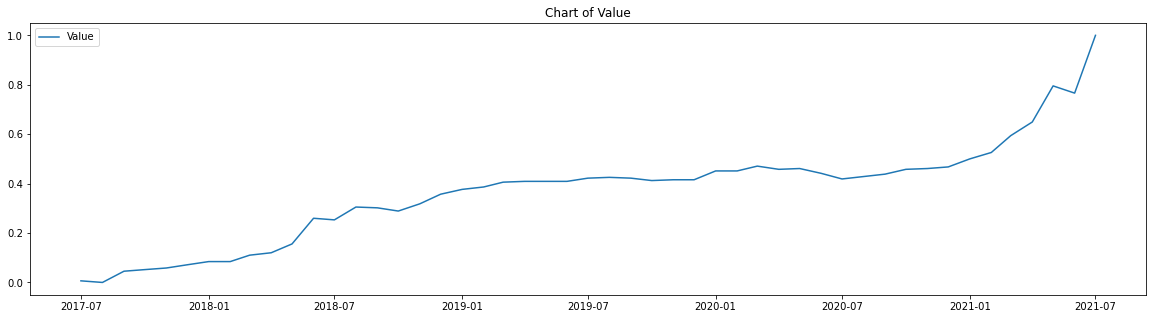

In [56]:
plt.figure(figsize=(20,5))
plt.plot(df_forecast_pot['Date'], df_forecast_pot['Value'], label='Value')
plt.title("Chart of Value")
plt.xlabel=("Date")
plt.ylabel =("Value")
plt.legend(loc = "upper left")
plt.show()

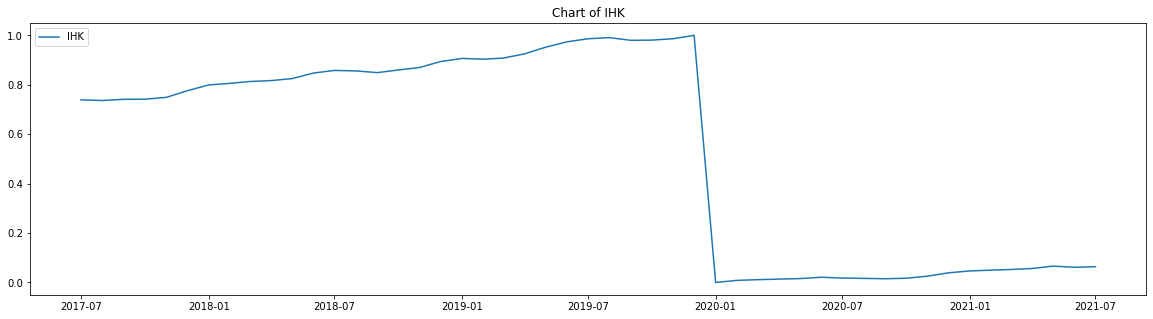

In [57]:
plt.figure(figsize=(20,5))
plt.plot(df_forecast_pot['Date'], df_forecast_pot['IHK'], label='IHK')
plt.title("Chart of IHK")
plt.xlabel=("Date")
plt.ylabel =("IHK")
plt.legend(loc = "upper left")
plt.show()

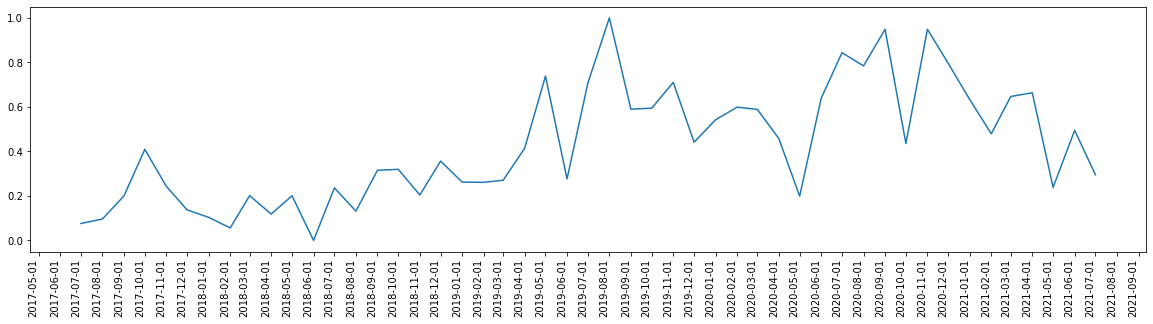

In [58]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(df_forecast_pot['Date'], df_forecast_pot['quantity'], label="quantity")

#ax.xaxis.set_major_formatter(formatter)
formatter = dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=90)
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))

plt.show()
# fig.subplots_adjust(bottom=0.3)
# plt.figure(figsize=(20,5))
# plt.xticks(rotation=90)
# plt.plot(df_forecast_pot['Date'], df_forecast_pot['quantity'])
# # plt.figure(figsize=(20,5))
# # plt.plot(df_forecast_pot['Date'], df_forecast_pot['quantity'], label='quantity')
# # plt.title("Chart of quantity")
# # plt.xlabel=("Date")
# # plt.ylabel =("Quantity")
# # plt.legend(loc = "upper left")
# # plt.show()